# Fitting Neural Networks with Keras

In much the same way that PyMC3 allows Bayesian models to be specified in Theano at a high level, Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow. Keras is a modular, extensible library that allows for easy construction of deep learning models. It includes classes for building either convolutional networks and recurrent networks, and supports CPU and GPU computation.

Keras is used for fast prototyping, advanced research, and production, with three key advantages:

1. **User friendly**: Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
2. **Modular and composable**: Keras models are made by connecting configurable building blocks together, with few restrictions.
3. **Easy to extend**: Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models.

Keras was recently integrated into the TensorFlow project, so it does not have to be separately downloaded, but is available as a sub-module.

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

To learn how deep neural networks are constructed in Keras, we will use a famous benchmarking dataset, MNIST. The MNIST database of handwritten digits, which includes a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST.

The original black and white images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. This results in a vector of 784 values for each image.

In [18]:
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Digits from 0 to 9
nb_classes = 10

In [19]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

We can convert the raw data for use in Keras.

First, the image data is rehshaped into a tabular format, converted to floats, and scaled.

In [20]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Finally, the output variable is converted from class vectors to binary class matrices:

In [21]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

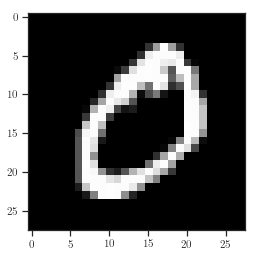

In [22]:
plt.imshow(X_train[1].reshape(28,28), cmap='gray')

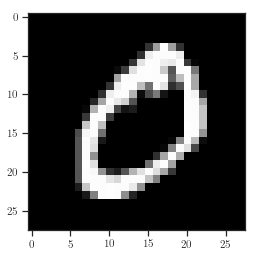

In [23]:
plt.imshow(X_train[1].reshape(28,28), cmap='gray')

### Building the model

The simplest model class in Keras is the `Sequential` class object. It allows networks to be constructed layer by layer, beginning with the data input and terminating with an output layer. Only the input layer requires explicit dimensions to be passed (via the keyword argument `input_dim`); the rest are inferred based on the size of the layer. 

Between layers, we also define an **activation** function for the outputs from the previous layer.

Here is a simple network with two hidden layers. The output layer will be of size 10, corresponding the the number of classes in the dataset.

In [24]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Activations can either be used through an `Activation` layer, as we have done here, or through the `activation` argument supported by all forward layers:

```python
model.add(Dense(64))
model.add(Activation('tanh'))
```

This is equivalent to:

```python
model.add(Dense(64, activation='tanh'))
```

For the hidden layers, we have used a **rectified linear unit (RELU)**. This is the simple function:

$$f(x) = \max(0, x)$$

This activation has beens shown to perform well in the training of deep neural networks for supervised learning. It is a sparse activation, and has efficient gradient propagation.

We use the **softmax** activation for the output layer because, like the logistic, it transforms inputs to the unit interval. 

### Configure the layers

There are many tf.keras.layers available with some common constructor parameters:

- `activation`: Set the activation function for the layer. This parameter is specified by the name of a built-in function or as a callable object. By default, no activation is applied.
- `kernel_initializer` and `bias_initializer`: The initialization schemes that create the layer's weights (kernel and bias). This parameter is a name or a callable object. This defaults to the "Glorot uniform" initializer.
- `kernel_regularizer` and `bias_regularizer`: The regularization schemes that apply the layer's weights (kernel and bias), such as L1 or L2 regularization. By default, no regularization is applied.

The following instantiates `tf.keras.layers.Dense` layers using constructor arguments:

In [25]:
from tensorflow.keras import regularizers, initializers

# Create a sigmoid layer:
Dense(64, activation='sigmoid')
# Or:
Dense(64, activation=tf.sigmoid)

# A linear layer with L1 regularization of factor 0.01 applied to the kernel matrix:
Dense(64, kernel_regularizer=regularizers.l1(0.01))
# A linear layer with L2 regularization of factor 0.01 applied to the bias vector:
Dense(64, bias_regularizer=regularizers.l2(0.01))

# A linear layer with a kernel initialized to a random orthogonal matrix:
Dense(64, kernel_initializer='orthogonal')
# A linear layer with a bias vector initialized to 2.0s:
Dense(64, bias_initializer=initializers.constant(2.0))

### Fitting the model

Fitting the model first requires a compilation step, for which we specify three arguments:

- an `optimizer`. This could be the string identifier of an existing optimizer (such as `rmsprop` or `adagrad`), or an instance of the `Optimizer` class. See: [optimizers](https://keras.io/optimizers/).
- a `loss` function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as `categorical_crossentropy` or `mse`), or it can be an objective function. See: [loss functions](https://keras.io/losses/).
- a list of `metrics`. For any classification problem you will want to set this to `metrics=['accuracy']`. A metric could be the string identifier of an existing metric (only `accuracy` is supported at this point), or a custom metric function. See: [metrics](https://keras.io/metrics/).

Here we will use `categorical_crossentropy`, since we are doing multi-class classification. The `RMSprop` algorithm is an unpublished, adaptive learning rate method proposed by Geoff Hinton in his [Coursera neural networks course](https://www.coursera.org/learn/neural-networks). It is an improvement on stochastic gradient descent (SGD), wich adjusts the step size to keep it on the same scale as the calculated gradient (SGD has a problem in that learning rates have to scale with 1/T to get convergence).

In [26]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

If we were dealing with continuous outputs, we might configure the model for mean-squared error regression:

```python
model.compile(optimizer=tf.train.AdamOptimizer(0.01),
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error
```

The easiest way to train our model is via the `fit` method. This requires the input data (both `X_train` and `y_train`), a `batch_size` (the number of samples per gradient update), and the number of `epochs` over which to train the model. 

In addition, `model.fit` has some optional parameters:

- `verbose`: how often the progress log is printed (0 for no log, 1 for progress bar logging, 2 for one line per epoch)
- `callbacks`: a list of callback objects that perform actions at certain events (see below)
- `validation_split`: splits the training data into training and validation sets. The value passed corresponds to the fraction of the data used for validation ( 
- `validation_data`: when you already have a validation set, pass a list in the format `[input, output]` here. Overrides `validation_split`.
- `shuffle` (default: `True`): shuffles the training data at each epoch.
- `class_weight` and `sample_weight`: used when you want to give different weights during training for certain classes or samples.

In [27]:
batch_size = 128
nb_epoch = 10

history = model.fit(X_train, y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2184 - acc: 0.9326 - val_loss: 0.1165 - val_acc: 0.9638
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0821 - acc: 0.9745 - val_loss: 0.0830 - val_acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0538 - acc: 0.9834 - val_loss: 0.0761 - val_acc: 0.9806
Epoch 4/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0386 - acc: 0.9882 - val_loss: 0.1071 - val_acc: 0.9714
Epoch 5/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0290 - acc: 0.9908 - val_loss: 0.0785 - val_acc: 0.9815
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0231 - acc: 0.9928 - val_loss: 0.1081 - val_acc: 0.9760
Epoch 7/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0183 - acc: 0.9943 - val_loss: 0.0980 - 

# Input NumPy data

For small datasets, use in-memory NumPy arrays to train and evaluate a model. The model is "fit" to the training data using the `fit` method:

In [29]:
data = np.random.random((1000, 784))
labels = np.random.random((1000, 10))

model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 231us/step - loss: 72.9734 - acc: 0.0890
Epoch 2/10
1000/1000 [==============================] - 0s 312us/step - loss: 73.1613 - acc: 0.0970
Epoch 3/10
1000/1000 [==============================] - 0s 259us/step - loss: 73.1613 - acc: 0.0970
Epoch 4/10
1000/1000 [==============================] - 0s 266us/step - loss: 73.1613 - acc: 0.0970
Epoch 5/10
1000/1000 [==============================] - 0s 269us/step - loss: 73.1613 - acc: 0.0970
Epoch 6/10
1000/1000 [==============================] - 0s 276us/step - loss: 73.1613 - acc: 0.0970
Epoch 7/10
1000/1000 [==============================] - 0s 272us/step - loss: 73.1613 - acc: 0.0970
Epoch 8/10
1000/1000 [==============================] - 0s 265us/step - loss: 73.1613 - acc: 0.0970
Epoch 9/10
1000/1000 [==============================] - 0s 241us/step - loss: 73.1613 - acc: 0.0970
Epoch 10/10
1000/1000 [==============================] - 0s 270us/step - loss: 73.1613 - acc: 0.0970

`tf.keras.Model.fit` takes three important arguments:

- ``: Training is structured into epochs. An epoch is one iteration over the entire input data (this is done in smaller batches).
- `batch_size`: When passed NumPy data, the model slices the data into smaller batches and iterates over these batches during training. This integer specifies the size of each batch. Be aware that the last batch may be smaller if the total number of samples is not divisible by the batch size.
- `validation_data`: When prototyping a model, you want to easily monitor its performance on some validation data. Passing this argument—a tuple of inputs and labels—allows the model to display the loss and metrics in inference mode for the passed data, at the end of each epoch.

Here's an example using `validation_data`:

In [31]:
val_data = np.random.random((100, 784))
val_labels = np.random.random((100, 10))

model.fit(data, labels, epochs=10, batch_size=32,
          validation_data=(val_data, val_labels))

Train on 1000 samples, validate on 100 samples
Epoch 1/10
1000/1000 [==============================] - 0s 253us/step - loss: 73.1613 - acc: 0.0970 - val_loss: 71.2092 - val_acc: 0.0600
Epoch 2/10
1000/1000 [==============================] - 0s 321us/step - loss: 73.1613 - acc: 0.0970 - val_loss: 71.2092 - val_acc: 0.0600
Epoch 3/10
1000/1000 [==============================] - 0s 279us/step - loss: 73.1613 - acc: 0.0970 - val_loss: 71.2092 - val_acc: 0.0600
Epoch 4/10
1000/1000 [==============================] - 0s 265us/step - loss: 73.1613 - acc: 0.0970 - val_loss: 71.2092 - val_acc: 0.0600
Epoch 5/10
1000/1000 [==============================] - 0s 265us/step - loss: 73.1613 - acc: 0.0970 - val_loss: 71.2092 - val_acc: 0.0600
Epoch 6/10
1000/1000 [==============================] - 0s 267us/step - loss: 73.1613 - acc: 0.0970 - val_loss: 71.2092 - val_acc: 0.0600
Epoch 7/10
1000/1000 [==============================] - 0s 269us/step - loss: 73.1613 - acc: 0.0970 - val_loss: 71.2092 - val

# Functional API

The `tf.keras.Sequential` model is a simple stack of layers that cannot represent arbitrary models. Use the Keras **functional API** to build complex model topologies such as:

- Multi-input models,
- Multi-output models,
- Models with shared layers (the same layer called several times),
- Models with non-sequential data flows (e.g. residual connections).

Building a model with the functional API works like this:

1. A layer instance is callable and returns a tensor.
2. Input tensors and output tensors are used to define a `tf.keras.Model` instance.
3. This model is trained just like the Sequential model.

The following example uses the functional API to build a simple, fully-connected network:

In [33]:
from tensorflow import keras

inputs = keras.Input(shape=(784,))  # Returns a placeholder tensor

# A layer instance is callable on a tensor, and returns a tensor.
x = keras.layers.Dense(64, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='relu')(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

# Instantiate the model given inputs and outputs.
model = keras.Model(inputs=inputs, outputs=predictions)

# The compile step specifies the training configuration.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Trains for 5 epochs
model.fit(data, labels, batch_size=32, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 0s 279us/step - loss: 11.8483 - acc: 0.1070
Epoch 2/5
1000/1000 [==============================] - 0s 60us/step - loss: 11.6235 - acc: 0.0990
Epoch 3/5
1000/1000 [==============================] - 0s 57us/step - loss: 11.5917 - acc: 0.1130
Epoch 4/5
1000/1000 [==============================] - 0s 58us/step - loss: 11.5839 - acc: 0.0980
Epoch 5/5
1000/1000 [==============================] - 0s 61us/step - loss: 11.5823 - acc: 0.1060


### Saving fitted models

Any given model will be composed of two separate parts:

- Its architecture, defined by your Keras code;
- the parameters, learned after training.

In order to reuse a previously trained model, Keras provides methods to serialize both the model architecture and its parameters separately. While it would be possible to use Python standard serialzation method (`pickle`), remember it is not necessarily portable across different Python versions (e.g., a file serialized using pickle on Python 2 will not load on Python 3 and vice-versa). Serializing the model architecture only works when the model does not use any `Lambda` layers; in that case, you have to reinstantiate the model programatically.

To serialize a model architecture, you can use the methods `model.to_json()` and `model.to_yaml()`. The only difference between both methods is the textual format used to serialize (YAML is meant to be more human-readable than JSON).

In [34]:
json_string = model.to_json()
json_string

'{"class_name": "Model", "config": {"name": "model_1", "layers": [{"name": "input_2", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "name": "input_2"}, "inbound_nodes": []}, {"name": "dense_15", "class_name": "Dense", "config": {"name": "dense_15", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "inbound_nodes": [[["input_2", 0, 0, {}]]]}, {"name": "dense_16", "class_name": "Dense", "config": {"name": "dense_16", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kerne

To save the model parameters, you can use the method `model.save_weights(filename)`. This saves *all* the model weights to an HDF5 file (which supports saving hierarchical data structures). This method already writes the file to the disk (as opposed to the methods described above). The `ModelCheckpoint` callback described above uses this function to save your model weights.

Having both the serialized architecture and parameters, you do not need the original code that generated the model to execute it anymore. This allows you to avoid the usual guesswork from iteratively running some experiments and fiddling with your code.

In [35]:
model.save_weights('model_weights.h5')

Both the model and the associated weights can then be restored, and reused for other datasets.

In [36]:
from tensorflow.keras.models import model_from_json

model = model_from_json(json_string)
model.load_weights('model_weights.h5')

### Exercise

Build a multi-layer neural network to predict wine varietals using the wine chemistry dataset.

In [40]:
wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

grape = wine.pop('region')
y = grape.values
wine.columns = attributes
X = wine[['Alcohol', 'Proline']].values

In [56]:
tf.keras.backend.clear_session()

#### Examining data

In [50]:
wine.shape

(178, 13)

In [46]:
X.shape

(178, 2)

In [45]:
y.shape

(178,)

#### Reshaping input parameters

In [61]:
y = y.reshape(len(y),-1)
y.shape

(178, 1)

In [62]:
X.shape

(178, 2)

#### Creating training and testing datasets

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Changing the y-arrays to categorical

In [65]:
y_test = to_categorical(y_test-1, 3)
y_train = to_categorical(y_train-1, 3)

#### Initializing model

In [66]:
model = Sequential()
model.add(Dense(64, input_shape=(X.shape)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 178, 64)           192       
_________________________________________________________________
activation (Activation)      (None, 178, 64)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 178, 64)           4160      
_________________________________________________________________
activation_1 (Activation)    (None, 178, 64)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 178, 3)            195       
_________________________________________________________________
activation_2 (Activation)    (None, 178, 3)            0         
Total params: 4,547
Trainable params: 4,547
Non-trainable params: 0
_________________________________________________________________


#### Fitting the model

In [67]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [68]:
history = model.fit(X_train, y_train,
                    epochs=10,
                   verbose=1,
                   validation_data=(X_test, y_test))

ValueError: Error when checking input: expected dense_input to have 3 dimensions, but got array with shape (119, 2)

---
## References

- [Keras User's Guide](https://www.tensorflow.org/guide/keras)